In [44]:
install.packages("s3")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [45]:
library("terra")
library("dplyr")
library("sf")
library("sp")
library("stringr")
library("s3")
library("aws.s3")
library("scales")

In [3]:
iso3 <- "BRA"

f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"

s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
admBRA <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBRA <- vect(admBRA)

allPAsBRA <- readRDS(s3_get(paste(f.path,"WDPA_shapefiles/WDPA_polygons/",iso3,"_PA_poly.rds",sep="")))
#write.csv(allPAsBRA@data, file=paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep=""))
#allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep="")))

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp



Reading layer `BRA' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 94 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.01847 ymin: -33.74228 xmax: -28.87706 ymax: 5.267225
Geodetic CRS:  WGS 84


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds



In [4]:
allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes2.csv",sep="")))

print(nrow(allPAsBRA_df))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG!="Indigenous Area" & allPAsBRA_df$DESIG_ENG!="Indigenous Reserve",]))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG=="Indigenous Area",]))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG=="Indigenous Reserve",]))

unique(allPAsBRA_df$IUCN_CAT)
unique(allPAsBRA_df$DESIG_ENG)

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes2.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes2.csv



[1] 2521
[1] 1802
[1] 700
[1] 19


[1] "Ia"             "II"             "V"              "IV"            
[5] "Not Reported"   "VI"             "Not Applicable" "III"           
[9] "Ib"

[1] "Biological Reserve"                              
 [2] "Park"                                            
 [3] "Ecological Station"                              
 [4] "Environmental Protection Area"                   
 [5] "Area of Relevant Ecological Interest"            
 [6] "Indigenous Area"                                 
 [7] "Forest"                                          
 [8] "World Heritage Site (natural or mixed)"          
 [9] "Natural Heritage Private Reserve"                
[10] "Sustainable Development Reserve"                 
[11] "Extractive Reserve"                              
[12] "Indigenous Reserve"                              
[13] "Ramsar Site, Wetland of International Importance"
[14] "Natural Monument"                                
[15] "Wildlife Refuge"

In [5]:
#gedi_BIOMESid_ALL <- read.csv("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_biomes2.csv")
#
#allPAsBRA_df$bbiome2 <- rep(NA,nrow(allPAsBRA_df))
#allPAsBRA_df$wwfbiome2 <- rep(NA,nrow(allPAsBRA_df))
#
#for(i in 1:nrow(gedi_BIOMESid_ALL)){
#    this_paid <- gedi_BIOMESid_ALL[i,"pa_id"]
#    #print(this_paid)
#    rownumber <- which(allPAsBRA_df$WDPAID==this_paid)
#    allPAsBRA_df[rownumber,"bbiome2"] <- gedi_BIOMESid_ALL[i,"bbiome2"]
#    allPAsBRA_df[rownumber,"wwfbiome2"] <- gedi_BIOMESid_ALL[i,"wwfbiom"]
#}
#
#write.csv(allPAsBRA_df, file="/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes2.csv")

In [6]:
iso3 <- "Baz"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBaz <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Baz.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Baz.shp



Reading layer `Baz' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Baz.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.98055 ymin: -16.30581 xmax: -43.61394 ymax: 5.250472
Geodetic CRS:  WGS 84


In [7]:
iso3 <- "BaE"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBaE <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp



Reading layer `BaE' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -61.6113 ymin: -16.30581 xmax: -43.61394 ymax: 4.430496
Geodetic CRS:  WGS 84


In [8]:
iso3 <- "BaW"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBaW <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp



Reading layer `BaW' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -73.98043 ymin: -13.66284 xmax: -56.31193 ymax: 5.241181
Geodetic CRS:  WGS 84


In [9]:
iso3 <- "Bca"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBca <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp



Reading layer `Bca' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -44.50887 ymin: -16.08888 xmax: -35.17211 ymax: -2.808682
Geodetic CRS:  WGS 84


In [10]:
iso3 <- "Bce"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBce <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp



Reading layer `Bce' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -60.10991 ymin: -24.68502 xmax: -41.5222 ymax: -2.340799
Geodetic CRS:  WGS 84


In [11]:
iso3 <- "Bma"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBma <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp



Reading layer `Bma' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -55.66354 ymin: -29.95173 xmax: -34.82325 ymax: -5.15406
Geodetic CRS:  WGS 84


In [12]:
iso3 <- "Bpp"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBpp <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp



Reading layer `Bpp' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -57.64434 ymin: -33.75473 xmax: -49.7159 ymax: -28.08345
Geodetic CRS:  WGS 84


In [13]:
iso3 <- "Bpt"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBpt <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp



Reading layer `Bpt' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -59.18886 ymin: -22.11834 xmax: -54.92231 ymax: -15.52386
Geodetic CRS:  WGS 84


In [14]:
expanse(admBRA, unit="km", transform=TRUE)
expanse(admBaz, unit="ha", transform=TRUE)
expanse(admBca, unit="ha", transform=TRUE)
expanse(admBce, unit="ha", transform=TRUE)
expanse(admBma, unit="ha", transform=TRUE)
expanse(admBpp, unit="ha", transform=TRUE)
expanse(admBpt, unit="ha", transform=TRUE)

[1] 8472670

[1] 418245962

[1] 82652544

[1] 203938110

[1] 110613622

[1] 17776635

[1] 15131296

In [15]:
expanse(admBaz, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)
expanse(admBca, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)
expanse(admBce, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)
expanse(admBma, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)
expanse(admBpp, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)
expanse(admBpt, unit="ha", transform=TRUE)/expanse(admBRA, unit="ha", transform=TRUE)

[1] 0.4936413

[1] 0.09755195

[1] 0.2407011

[1] 0.1305534

[1] 0.02098115

[1] 0.01785895

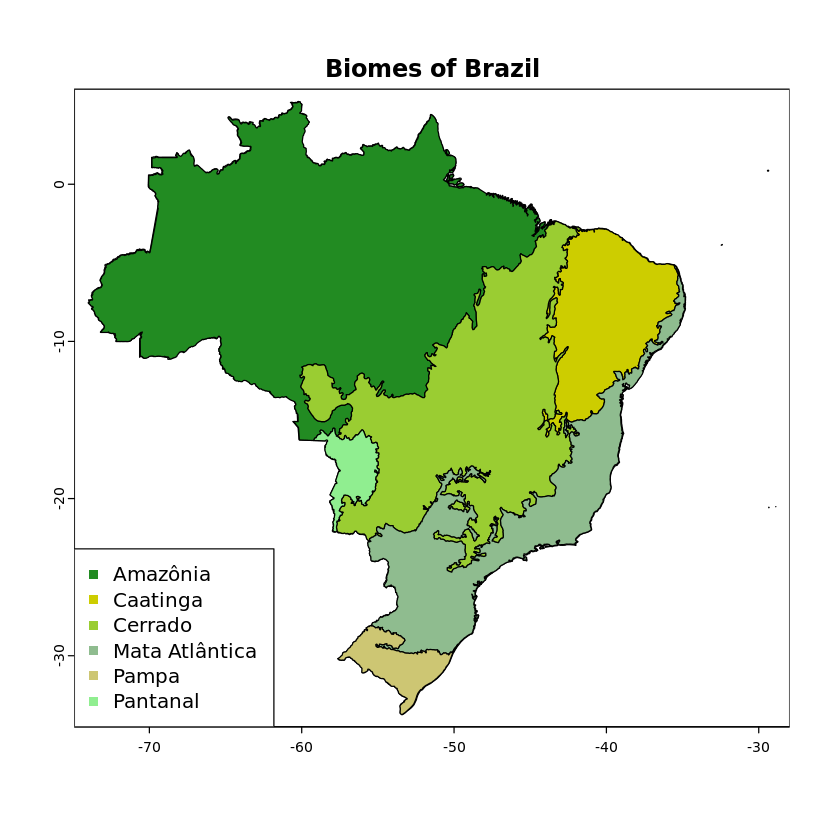

In [16]:
plot(admBRA, main="Biomes of Brazil")

#plot(admBaE, col="forestgreen", add=T)
#plot(admBaW, col="darkgreen", add=T)
plot(admBaz, col="forestgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

#legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#add_legend("bottomleft", legend=legend2, pch=15,
#           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

legend=c("Baz","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

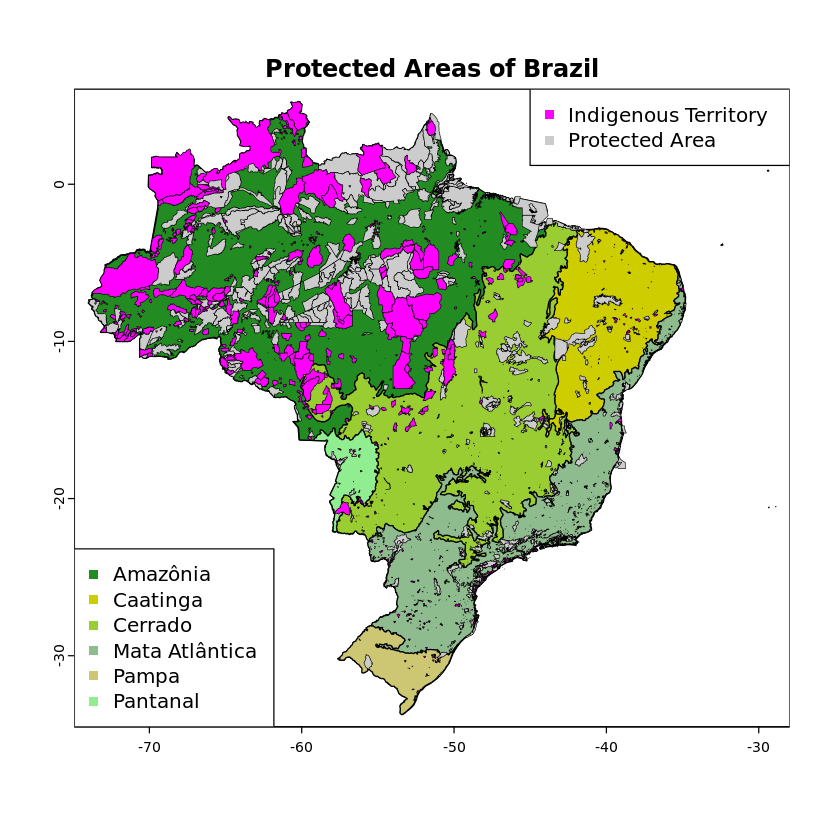

In [17]:
plot(admBRA, main="Protected Areas of Brazil")

#plot(admBaE, col="forestgreen", add=T)
#plot(admBaW, col="darkgreen", add=T)
plot(admBaz, col="forestgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

#legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#add_legend("bottomleft", legend=legend2, pch=15,
#           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

##all
plot(allPAsBRA[allPAsBRA$DESIG_ENG!="Indigenous Area" &
               allPAsBRA$DESIG_ENG!="Indigenous Reserve",], col="gray80", lwd=0.5, add=T)
plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Area" |
               allPAsBRA$DESIG_ENG=="Indigenous Reserve",], col="magenta", lwd=0.5, add=T)
     
legend=c("Baz","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

add_legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [18]:
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"
#f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#gediwk <- 24
#pa_stats <- list()
#iso3s <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#
#for(i in 1:length(iso3s)){
#    iso3 <- iso3s[i]
#    pa_stats[[i]] <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_wk",gediwk,".csv", sep="")))
#    pa_stats[[i]]$bbiom <- rep(iso3,nrow(pa_stats[[i]]))
#    print(nrow(pa_stats[[i]]))
#}
#length(pa_stats)
#pa_stats_BRA <- dplyr::bind_rows(pa_stats)

#pa_stats_BRA$rh98_difA <- pa_stats_BRA$meanrh98_1 - pa_stats_BRA$meanrh98_0
#pa_stats_BRA$rh98_difP <- 100*(pa_stats_BRA$meanrh98_1 - pa_stats_BRA$meanrh98_0)/pa_stats_BRA$meanrh98_0
#pa_stats_BRA$agbd_difA <- pa_stats_BRA$meanagbd_1 - pa_stats_BRA$meanagbd_0
#pa_stats_BRA$agbd_difP <- 100*(pa_stats_BRA$meanagbd_1 - pa_stats_BRA$meanagbd_0)/pa_stats_BRA$meanagbd_0
#
#allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep="")))
#colnames(allPAsBRA_df)
#nrow(allPAsBRA_df)
#nrow(pa_stats_BRA)
#
#pa_stats_BRA$WDPAID <- pa_stats_BRA$pa_id
#pa_stats_BRA_merg <- merge(pa_stats_BRA, allPAsBRA_df, by="WDPAID", all.x=TRUE)
#dim(pa_stats_BRA_merg)
#colnames(pa_stats_BRA_merg)
#
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"
#write.csv(pa_stats_BRA_merg, row.names=FALSE,
#          file=paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_MERGE_wk",gediwk,".csv", sep=""))
#

In [19]:
#gedi_BIOMESid_ALL <- read.csv("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_biomes2.csv")
#
#pa_stats_BRA_merg$bbiome2 <- rep(NA,nrow(pa_stats_BRA_merg))
#pa_stats_BRA_merg$wwfbiome2 <- rep(NA,nrow(pa_stats_BRA_merg))
#
#for(i in 1:nrow(gedi_BIOMESid_ALL)){
#    this_paid <- gedi_BIOMESid_ALL[i,"pa_id"]
#    #print(this_paid)
#    rownumber <- which(pa_stats_BRA_merg$WDPAID==this_paid)
#    pa_stats_BRA_merg[rownumber,"bbiome2"] <- gedi_BIOMESid_ALL[i,"bbiome2"]
#    pa_stats_BRA_merg[rownumber,"wwfbiome2"] <- gedi_BIOMESid_ALL[i,"wwfbiom"]
#}
#
#write.csv(pa_stats_BRA_merg, file="/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24.csv", row.names=FALSE)

In [20]:
#unlink(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_MERGE_wk",gediwk,".csv", sep=""))

In [21]:
f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
gediwk <- 24
iso3 <- "BRA"
#pa_stats_BRA <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_wk",gediwk,".csv", sep="")))
#dim(pa_stats_BRA)
#colnames(pa_stats_BRA)
pa_stats_BRA_merg <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_MERGE_wk",gediwk,"_2.csv", sep="")))
dim(pa_stats_BRA_merg)
colnames(pa_stats_BRA_merg)
length(unique(pa_stats_BRA_merg$pa_id))

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv



[1] 1618   59

[1] "X.1"                  "WDPAID"               "pa_id"               
 [4] "count_0"              "count_1"              "meanrh98_0"          
 [7] "meanrh98_1"           "sdrh98_0"             "sdrh98_1"            
[10] "meanagbd_0"           "meanagbd_1"           "sdagbd_0"            
[13] "sdagbd_1"             "wwfbiom_0"            "wwfbiom_1"           
[16] "wwfecoreg_0"          "wwfecoreg_1"          "REGION_0"            
[19] "REGION_1"             "PFT_0"                "PFT_1"               
[22] "iso3"                 "rh98_difA"            "rh98_difP"           
[25] "agbd_difA"            "agbd_difP"            "X"                   
[28] "WDPA_PID"             "PA_DEF"               "NAME"                
[31] "ORIG_NAME"            "DESIG"                "DESIG_ENG"           
[34] "DESIG_TYPE"           "IUCN_CAT"             "INT_CRIT"            
[37] "MARINE"               "REP_M_AREA"           "GIS_M_AREA"          
[40] "REP_AREA"             "GIS_AREA"             "NO_TAKE"             
[43] "NO_TK_AREA"           "STATUS"               "STATUS_YR"           
[46] "GOV_TYPE"             "OWN_TYPE"             "MANG_AUTH"           
[49] "MANG_PLAN"            "VERIF"                "METADATAID"          
[52] "SUB_LOC"              "PARENT_ISO"           "ISO3"                
[55] "bbiome2"              "wwfbiome2"            "pa_area_ha"          
[58] "total_AGB"            "total_additional_AGB"

[1] 1618

In [22]:
allPAsBRA_rowIDs <- c()
for(i in 1:length(pa_stats_BRA_merg$pa_id)){
    rowID <- which(allPAsBRA$WDPAID==pa_stats_BRA_merg$pa_id[i])
    allPAsBRA_rowIDs <- c(allPAsBRA_rowIDs, rowID)
}
length(allPAsBRA_rowIDs)    

[1] 1618

In [23]:
allPAsBRA_extracted <- allPAsBRA[allPAsBRA_rowIDs,]
nrow(allPAsBRA_extracted)
allPAsBRA_NOTextracted <- allPAsBRA[-allPAsBRA_rowIDs,]
nrow(allPAsBRA_NOTextracted)

[1] 1618

[1] 903

In [24]:
allPAsBRA_NOTextracted_IT <- allPAsBRA_NOTextracted[allPAsBRA_NOTextracted$DESIG_ENG=="Indigenous Area" |
                                              allPAsBRA_NOTextracted$DESIG_ENG=="Indigenous Reserve",]
allPAsBRA_NOTextracted_PA <- allPAsBRA_NOTextracted[allPAsBRA_NOTextracted$DESIG_ENG!="Indigenous Area" &
                                              allPAsBRA_NOTextracted$DESIG_ENG!="Indigenous Reserve",]
nrow(allPAsBRA_NOTextracted_IT)
nrow(allPAsBRA_NOTextracted_PA)

[1] 84

[1] 819

In [25]:
allPAsBRA_extracted_IT <- allPAsBRA_extracted[allPAsBRA_extracted$DESIG_ENG=="Indigenous Area" |
                                              allPAsBRA_extracted$DESIG_ENG=="Indigenous Reserve",]
allPAsBRA_extracted_PA <- allPAsBRA_extracted[allPAsBRA_extracted$DESIG_ENG!="Indigenous Area" &
                                              allPAsBRA_extracted$DESIG_ENG!="Indigenous Reserve",]
nrow(allPAsBRA_extracted_IT)
nrow(allPAsBRA_extracted_PA)

[1] 635

[1] 983

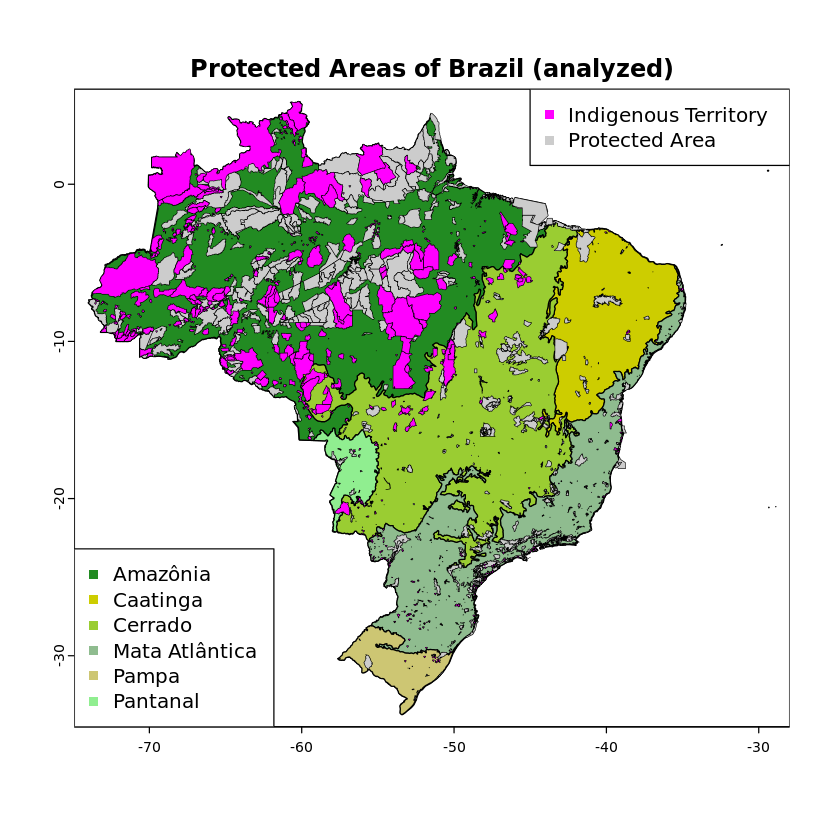

In [26]:
plot(admBRA, main="Protected Areas of Brazil (analyzed)")

#plot(admBaE, col="forestgreen", add=T)
#plot(admBaW, col="darkgreen", add=T)
plot(admBaz, col="forestgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

#legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#add_legend("bottomleft", legend=legend2, pch=15,
#           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

##extracted only
plot(allPAsBRA_extracted_PA, col="gray80", lwd=0.5, add=T)
plot(allPAsBRA_extracted_IT, col="magenta", lwd=0.5, add=T)
     
legend=c("Baz","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

add_legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

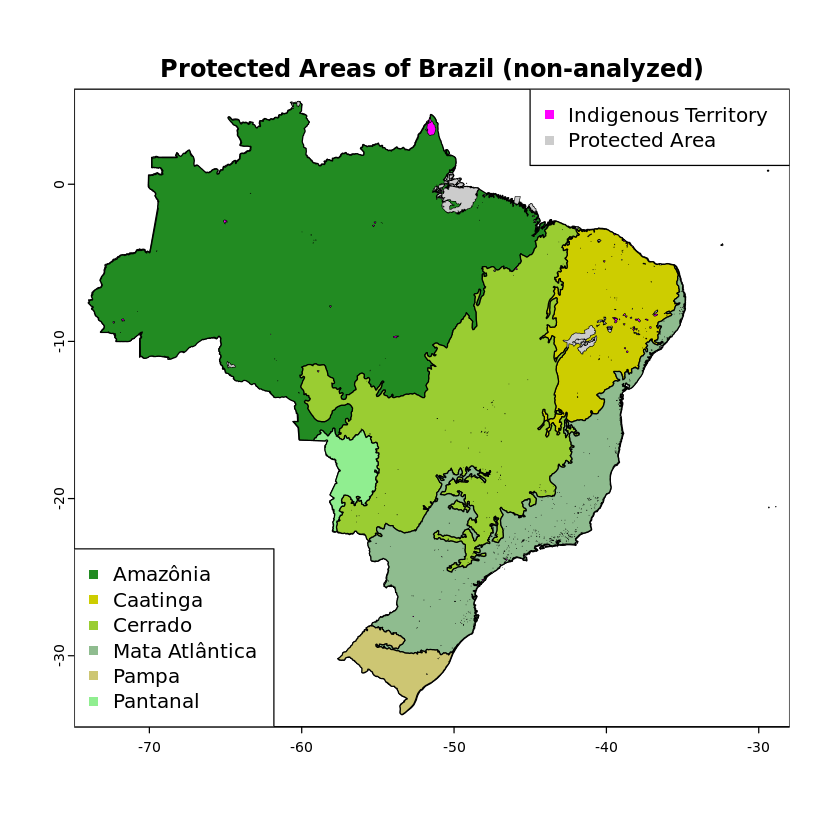

In [27]:
plot(admBRA, main="Protected Areas of Brazil (non-analyzed)")

#plot(admBaE, col="forestgreen", add=T)
#plot(admBaW, col="darkgreen", add=T)
plot(admBaz, col="forestgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

#legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#add_legend("bottomleft", legend=legend2, pch=15,
#           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

##NOTextracted only
plot(allPAsBRA_NOTextracted_PA, col="gray80", lwd=0.5, add=T)
plot(allPAsBRA_NOTextracted_IT, col="magenta", lwd=0.5, add=T)
     
legend=c("Baz","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

add_legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [28]:
summary(allPAsBRA$GIS_AREA)
summary(allPAsBRA_NOTextracted$GIS_AREA)
summary(allPAsBRA_extracted$GIS_AREA)
summary(allPAsBRA_extracted_IT$GIS_AREA)
summary(allPAsBRA_extracted_PA$GIS_AREA)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.01      1.51     33.13   1181.10    263.29 120284.65 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.01     0.16     0.56   100.60     2.49 45552.84 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.69     28.61    104.67   1784.12    902.11 120284.65 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.67    87.10   104.66  1777.84   820.09 96274.05 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.69     16.25    108.18   1788.18   1008.93 120284.65 

In [29]:
#duplicatedIDs <- readRDS("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_biomes2_duplicatedWDPAIDs.RDS")

#for(i in 1:length(duplicatedIDs)){
#pa_id <- duplicatedIDs[i]
#pa_id <- 555682347
#plot(allPAsBRA[allPAsBRA$WDPAID==pa_id,], border="red", lwd=0.5, main=print(pa_id))

#    plot(admBaE, col="forestgreen", add=T)
#    plot(admBaW, col="darkgreen", add=T)
#    plot(admBca, col="yellow3", add=T)
#    plot(admBce, col="yellowgreen", add=T)
#    plot(admBma, col="darkseagreen", add=T)
#    plot(admBpp, col="khaki3", add=T)
#    plot(admBpt, col="lightgreen", add=T)

#    plot(allPAsBRA[allPAsBRA$WDPAID==pa_id,], border="red", add=T)

#plot(admBRA, main="Protected Areas of Brazil (duplicateIDs)")

#    plot(admBaE, col="forestgreen", add=T)
#    plot(admBaW, col="darkgreen", add=T)
#    plot(admBca, col="yellow3", add=T)
#    plot(admBce, col="yellowgreen", add=T)
#    plot(admBma, col="darkseagreen", add=T)
#    plot(admBpp, col="khaki3", add=T)
#    plot(admBpt, col="lightgreen", add=T)

#    plot(allPAsBRA[allPAsBRA$WDPAID==pa_id,], border="red", add=T)
#}

In [30]:
#f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#gediwk <- 24
#iso3 <- "BRA"
#pa_stats_BRA_merg <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_MERGE_wk",gediwk,".csv", sep="")))
dim(pa_stats_BRA_merg)
colnames(pa_stats_BRA_merg)
length(unique(pa_stats_BRA_merg$pa_id))

[1] 1618   59

[1] "X.1"                  "WDPAID"               "pa_id"               
 [4] "count_0"              "count_1"              "meanrh98_0"          
 [7] "meanrh98_1"           "sdrh98_0"             "sdrh98_1"            
[10] "meanagbd_0"           "meanagbd_1"           "sdagbd_0"            
[13] "sdagbd_1"             "wwfbiom_0"            "wwfbiom_1"           
[16] "wwfecoreg_0"          "wwfecoreg_1"          "REGION_0"            
[19] "REGION_1"             "PFT_0"                "PFT_1"               
[22] "iso3"                 "rh98_difA"            "rh98_difP"           
[25] "agbd_difA"            "agbd_difP"            "X"                   
[28] "WDPA_PID"             "PA_DEF"               "NAME"                
[31] "ORIG_NAME"            "DESIG"                "DESIG_ENG"           
[34] "DESIG_TYPE"           "IUCN_CAT"             "INT_CRIT"            
[37] "MARINE"               "REP_M_AREA"           "GIS_M_AREA"          
[40] "REP_AREA"             "GIS_AREA"             "NO_TAKE"             
[43] "NO_TK_AREA"           "STATUS"               "STATUS_YR"           
[46] "GOV_TYPE"             "OWN_TYPE"             "MANG_AUTH"           
[49] "MANG_PLAN"            "VERIF"                "METADATAID"          
[52] "SUB_LOC"              "PARENT_ISO"           "ISO3"                
[55] "bbiome2"              "wwfbiome2"            "pa_area_ha"          
[58] "total_AGB"            "total_additional_AGB"

[1] 1618

In [31]:
## rep_area_ha = GIS_AREA * 100  #reported area is in km2
## total_additional_agc = rep_area_ha * agbd_diff * 0.49/1000  # agc in mg, total in kt
## rank by mean_agbd_diff and by mean_agbd_diff x rep_area
#pa_area_tsgss %>%  arrange(desc(agbd_diff))
#pa_area_tsgss %>%  arrange(desc(total_additional_agc))
#pa_area_tsgss %>%  arrange(desc(rep_area_ha))

In [32]:
#pa_stats_BRA_merg$pa_area_ha <- pa_stats_BRA_merg$GIS_AREA * 100
#pa_stats_BRA_merg$total_AGB <- pa_stats_BRA_merg$pa_area_ha * pa_stats_BRA_merg$meanagbd_1
#pa_stats_BRA_merg$total_additional_AGB <- pa_stats_BRA_merg$pa_area_ha * pa_stats_BRA_merg$agbd_difA
#write.csv(pa_stats_BRA_merg, "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv",row.names=FALSE)

In [33]:
pa_stats_BRA_merg <- read.csv("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv")
colnames(pa_stats_BRA_merg)

[1] "X.1"                  "WDPAID"               "pa_id"               
 [4] "count_0"              "count_1"              "meanrh98_0"          
 [7] "meanrh98_1"           "sdrh98_0"             "sdrh98_1"            
[10] "meanagbd_0"           "meanagbd_1"           "sdagbd_0"            
[13] "sdagbd_1"             "wwfbiom_0"            "wwfbiom_1"           
[16] "wwfecoreg_0"          "wwfecoreg_1"          "REGION_0"            
[19] "REGION_1"             "PFT_0"                "PFT_1"               
[22] "iso3"                 "rh98_difA"            "rh98_difP"           
[25] "agbd_difA"            "agbd_difP"            "X"                   
[28] "WDPA_PID"             "PA_DEF"               "NAME"                
[31] "ORIG_NAME"            "DESIG"                "DESIG_ENG"           
[34] "DESIG_TYPE"           "IUCN_CAT"             "INT_CRIT"            
[37] "MARINE"               "REP_M_AREA"           "GIS_M_AREA"          
[40] "REP_AREA"             "GIS_AREA"             "NO_TAKE"             
[43] "NO_TK_AREA"           "STATUS"               "STATUS_YR"           
[46] "GOV_TYPE"             "OWN_TYPE"             "MANG_AUTH"           
[49] "MANG_PLAN"            "VERIF"                "METADATAID"          
[52] "SUB_LOC"              "PARENT_ISO"           "ISO3"                
[55] "bbiome2"              "wwfbiome2"            "pa_area_ha"          
[58] "total_AGB"            "total_additional_AGB"

In [51]:
#pa_stats_BRA_merg %>%  arrange(desc(total_AGB))
#pa_stats_BRA_merg %>%  arrange(desc(total_additional_AGB))
#pa_stats_BRA_merg %>%  arrange(desc(pa_area_ha))

## create output tables: stories - either having extraordinary level of effectivenss or large areas

In [74]:
## ranking by mean_agbd_diff
table1 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(agbd_difA)) %>% head(20) %>% 
  dplyr::mutate(pa_area_ha = format(round(as.numeric(pa_area_ha),2), nsmall=2, big.mark=","),
                total_additional_AGB = format(round(total_additional_AGB,2), nsmall=2, big.mark=","))

names(table1) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')
#table1
filepath <- "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/"
filename <- "BRA_pa_stats_summary_TABLE1_meanAGBD.csv"
write.csv(table1, file=paste(filepath, filename, sep=""), row.names=FALSE)

In [75]:
## ranking by mean_agbd_diff
table1 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(agbd_difA)) %>% head(nrow(pa_stats_BRA_merg)) %>% 
  dplyr::mutate(pa_area_ha = format(round(as.numeric(pa_area_ha),2), nsmall=2, big.mark=","),
                total_additional_AGB = format(round(total_additional_AGB,2), nsmall=2, big.mark=","))

names(table1) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')

filepath <- "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/"
filename <- "BRA_pa_stats_summary_TABLE1ALL_meanAGBD.csv"
write.csv(table1, file=paste(filepath, filename, sep=""), row.names=FALSE)

In [76]:
## ranking by total preserved AGB
table2 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(total_additional_AGB)) %>% head(20) %>% 
  dplyr::mutate(pa_area_ha = format(as.numeric(pa_area_ha), nsmall=2, big.mark=",") ,
                total_additional_AGB = format(total_additional_AGB, nsmall=1, big.mark=",") )

names(table2) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')
table2
filepath <- "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/"
filename <- "BRA_pa_stats_summary_TABLE2_totalAGB.csv"
write.csv(table2, file=paste(filepath, filename, sep=""), row.names=FALSE)

,PA ID,PA name,Designation,Mean additional preserved AGBD (Mg/ha),Total additional preserved AGB (kt),Area (ha),Ecoregion,Biome,Region
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,351784,Parque Nacional Montanhas Do Tumucumaque,Park,101.81702,"396,188,605.5","3,891,182.60",Guianan moist forests,TSMBF,Baz
2,352198,Estação Ecológica Do Grão Pará,Ecological Station,76.76204,"324,866,664.4","4,232,126.61",Uatuma-Trombetas moist forests,TSGSS+TSMBF,Baz
3,10801,Parque do Tumucumaque,Indigenous Area,102.96325,"318,366,903.8","3,092,044.16",Guianan moist forests,TSGSS+TSMBF,Baz
4,555576204,Floresta Estadual Do Amapá,Forest,97.09457,"231,693,402.3","2,386,265.38",Guianan moist forests,TSMBF+TSGSS,Baz
5,352200,Floresta Estadual Do Paru,Forest,61.55249,"223,705,013.0","3,634,377.94",Uatuma-Trombetas moist forests,TSMBF,Baz
6,33920,Vale do Javari,Indigenous Area,19.55347,"167,971,996.4","8,590,393.20",Southwest Amazon moist forests,TSMBF,Baz
7,352201,Floresta Estadual Do Trombetas,Forest,47.39858,"150,004,625.1","3,164,749.29",Uatuma-Trombetas moist forests,TSMBF,Baz
8,34849,Rio Paru D'Este,Indigenous Area,122.94852,"147,867,807.8","1,202,680.69",Uatuma-Trombetas moist forests,TSMBF,Baz
9,352202,Reserva Biológica De Maicuru,Biological Reserve,120.14325,"141,885,908.7","1,180,972.82",Uatuma-Trombetas moist forests,TSMBF,Baz


In [77]:
## ranking by total preserved AGB
table2 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(total_additional_AGB)) %>% head(nrow(pa_stats_BRA_merg)) %>% 
  dplyr::mutate(pa_area_ha = format(as.numeric(pa_area_ha), nsmall=2, big.mark=",") ,
                total_additional_AGB = format(total_additional_AGB, nsmall=1, big.mark=",") )

names(table2) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')
#table2
filepath <- "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/"
filename <- "BRA_pa_stats_summary_TABLE2ALL_totalAGB.csv"
write.csv(table2, file=paste(filepath, filename, sep=""), row.names=FALSE)

In [90]:
breaks_rh98 <- seq(-20,20,1)
ylim_rh98 <- c(0,0.2)
xlab_rh98 <- "abs diff rh98 (meters)"

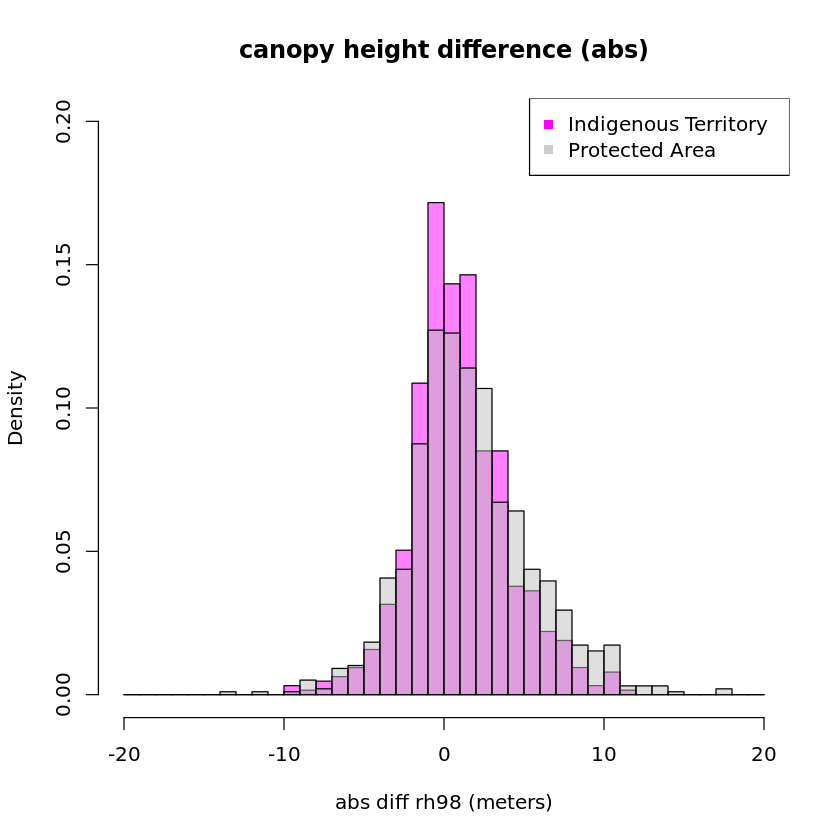

In [91]:
hist(BRA_merg_IT$rh98_difA,
     breaks=breaks_rh98, ylim=ylim_rh98, xlab=xlab_rh98,
     col=alpha("magenta",0.5), freq=F,
    main="canopy height difference (abs)")

hist(BRA_merg_PA$rh98_difA,
     freq=F, add=T, breaks=breaks_rh98,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [92]:
breaks_rh98 <- seq(-100,600,10)
ylim_rh98 <- c(0,0.025)
xlab_rh98 <- "% diff rh98"

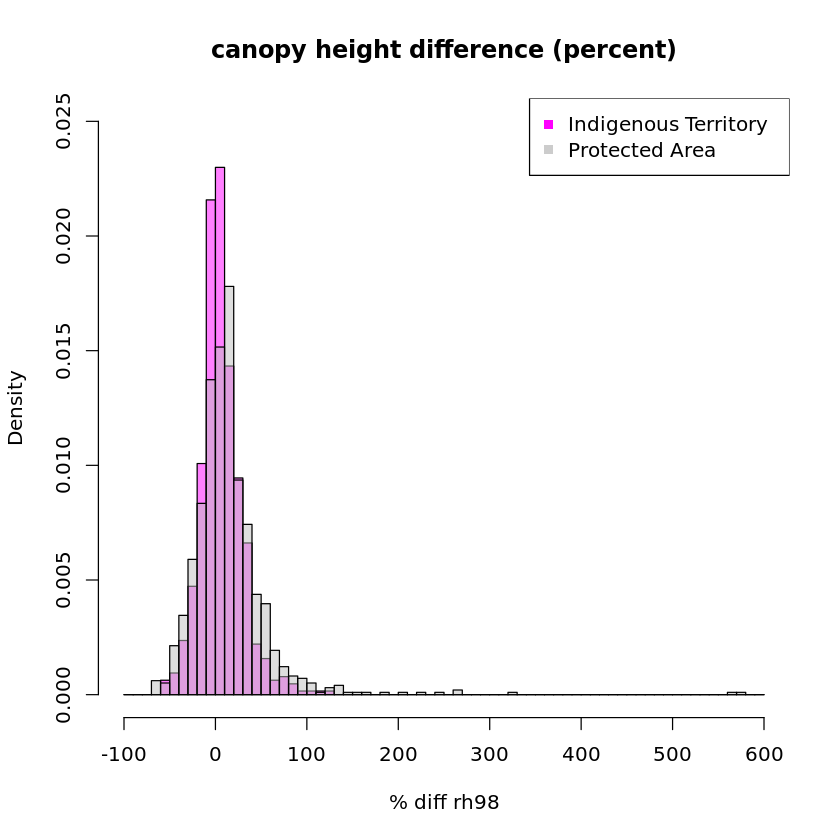

In [93]:
hist(BRA_merg_IT$rh98_difP,
     breaks=breaks_rh98, ylim=ylim_rh98, xlab=xlab_rh98,
     col=alpha("magenta",0.5), freq=F,
    main="canopy height difference (percent)")

hist(BRA_merg_PA$rh98_difP,
     freq=F, add=T, breaks=breaks_rh98,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [94]:
breaks_agbd <- seq(-200,200,10)
ylim_agbd <- c(0,0.025)
xlab_agbd <- "abs diff agbd (Mg/ha)"

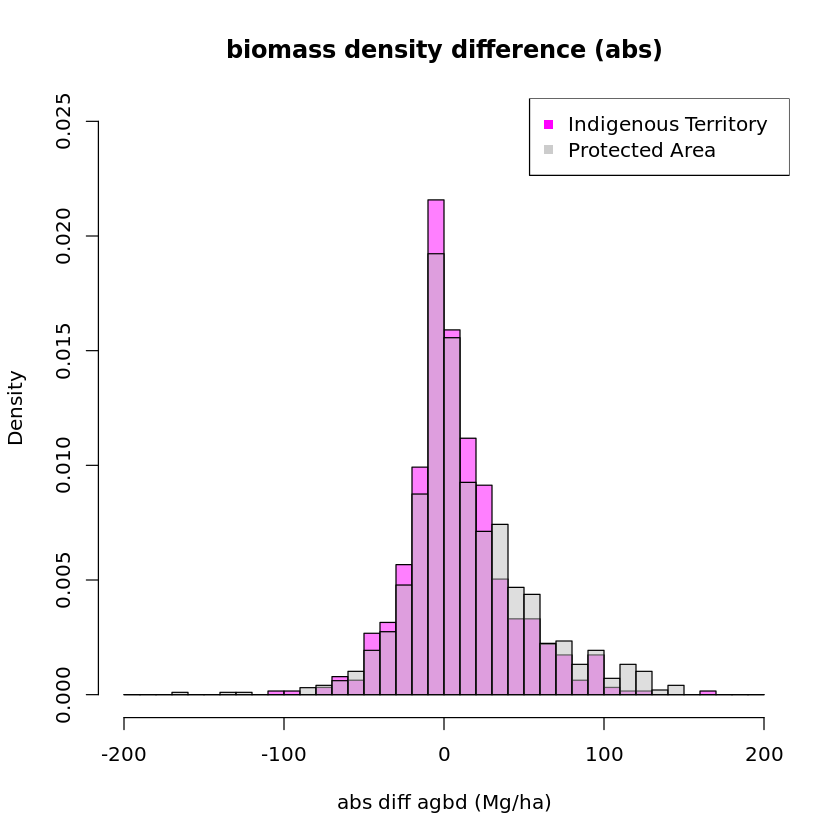

In [95]:
hist(BRA_merg_IT$agbd_difA,
     breaks=breaks_agbd, ylim=ylim_agbd, xlab=xlab_agbd,
     col=alpha("magenta",0.5), freq=F,
    main="biomass density difference (abs)")

hist(BRA_merg_PA$agbd_difA,
     freq=F, add=T,
     breaks=breaks_agbd,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [98]:
breaks_agbd <- seq(-100,7500,100)
ylim_agbd <- c(0,0.005)
xlab_agbd <- "% diff agbd"

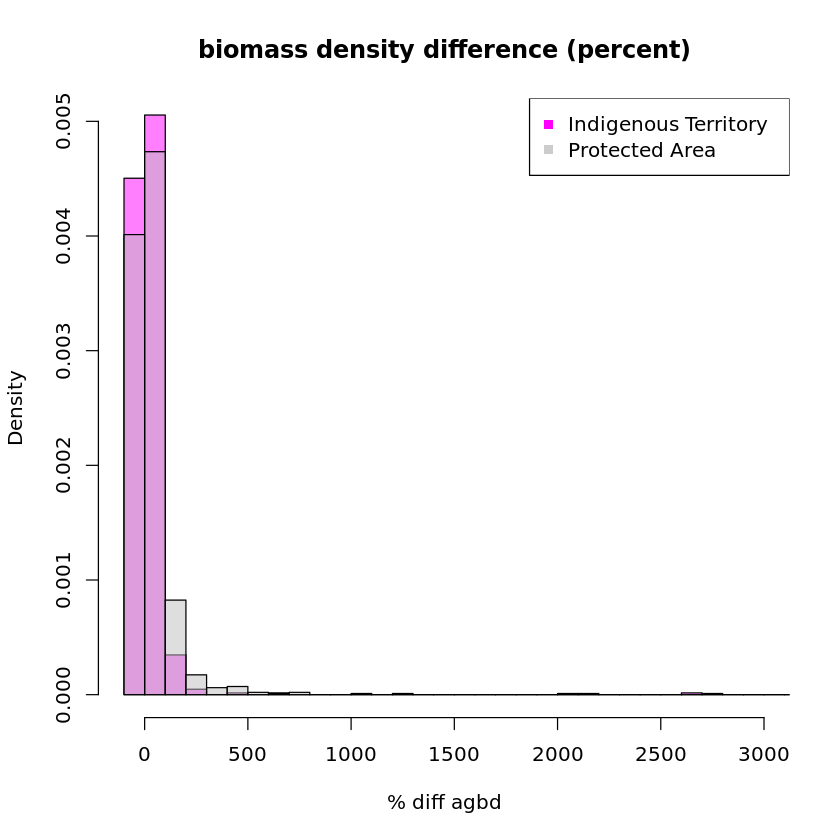

In [99]:
hist(BRA_merg_IT$agbd_difP,
     breaks=breaks_agbd, ylim=ylim_agbd, xlab=xlab_agbd,
     col=alpha("magenta",0.5), freq=F,
     xlim=c(-100,3000),
    main="biomass density difference (percent)")

hist(BRA_merg_PA$agbd_difP,
     freq=F, add=T,
     breaks=breaks_agbd,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [100]:
sort(unique(pa_stats_BRA_merg[,"wwfbiom_1"]))

[1] "Deserts & Xeric Shrublands"                              
[2] "Flooded Grasslands & Savannas"                           
[3] "Mangroves"                                               
[4] "Tropical & Subtropical Dry Broadleaf Forests"            
[5] "Tropical & Subtropical Grasslands, Savannas & Shrublands"
[6] "Tropical & Subtropical Moist Broadleaf Forests"

In [34]:
##
biome_summary <- matrix(0, nrow=7, ncol=2)
#colnames(biome_summary) <- c("INDIGENOUS", "OTHER")
colnames(biome_summary) <- c("IT", "PA")
row.names(biome_summary) <- c("rh0","agbd0","rh1","agbd1","absdiff","percdiff","numPAs")
#biome_summary
##
#biome_names <- c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#biome_ids <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
biome_names <- sort(unique(pa_stats_BRA_merg[,"wwfbiom_1"]))
biome_ids <- c("DXS","FGS","M","TSDBF","TSGSS","TSMBF")

##
BIOMES_summary <- vector(mode="list", length=length(biome_ids))


In [35]:
for(i in 1:length(biome_ids)){
  print(biome_names[i])
  
  BIOMES_summary[[i]] <- biome_summary
  
  biome1 <- pa_stats_BRA_merg[pa_stats_BRA_merg$wwfbiom_1 == biome_names[i],]
  biome1_indig <- biome1[biome1[,"DESIG_ENG"]=="Indigenous Area" | biome1[,"DESIG_ENG"]=="Indigenous Reserve",]
  biome1_other <- biome1[biome1[,"DESIG_ENG"]!="Indigenous Area" & biome1[,"DESIG_ENG"]!="Indigenous Reserve",]
  
  BIOMES_summary[[i]]["rh0",1] <- mean(biome1_indig[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",1] <- mean(biome1_indig[,"meanrh98_1"])
  BIOMES_summary[[i]]["rh0",2] <- mean(biome1_other[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",2] <- mean(biome1_other[,"meanrh98_1"])
    
  BIOMES_summary[[i]]["agbd0",1] <- mean(biome1_indig[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",1] <- mean(biome1_indig[,"meanagbd_1"])
  BIOMES_summary[[i]]["agbd0",2] <- mean(biome1_other[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",2] <- mean(biome1_other[,"meanagbd_1"])
  
  BIOMES_summary[[i]]["absdiff",1] <- mean(biome1_indig[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["absdiff",2] <- mean(biome1_other[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",1] <- mean(biome1_indig[,"agbd_difP"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",2] <- mean(biome1_other[,"agbd_difP"], na.rm=T)
  
  BIOMES_summary[[i]]["numPAs",1] <- nrow(biome1_indig)
  BIOMES_summary[[i]]["numPAs",2] <- nrow(biome1_other)
}



[1] "Deserts & Xeric Shrublands"
[1] "Flooded Grasslands & Savannas"
[1] "Mangroves"
[1] "Tropical & Subtropical Dry Broadleaf Forests"
[1] "Tropical & Subtropical Grasslands, Savannas & Shrublands"
[1] "Tropical & Subtropical Moist Broadleaf Forests"


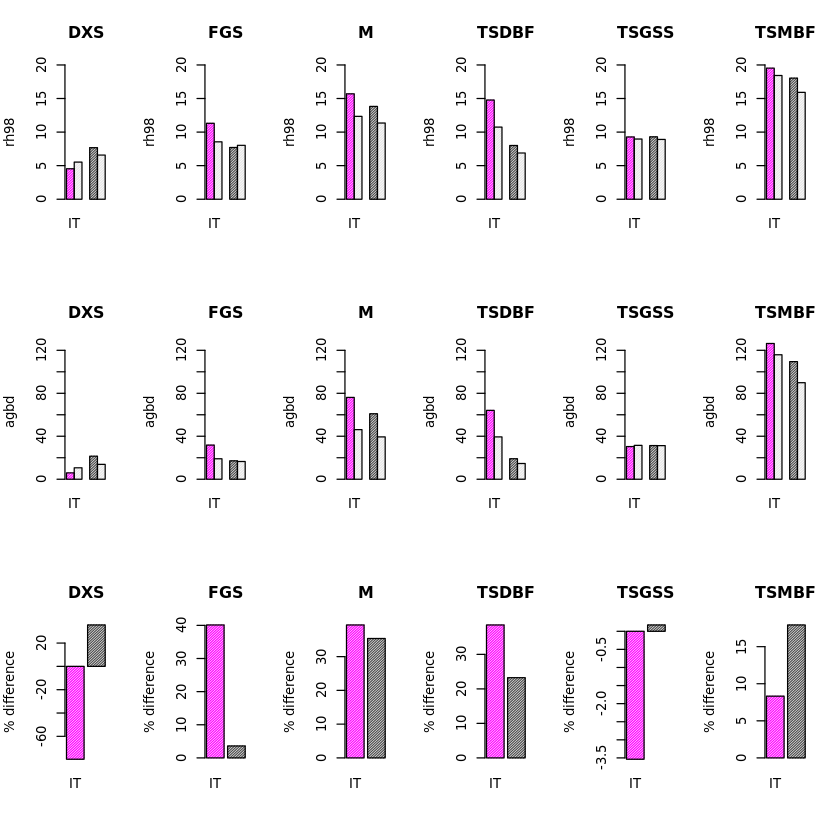

In [40]:
names(BIOMES_summary) <- as.vector(biome_ids)
#BIOMES_summary

par(mfrow=c(3,6))
for(i in 1:6){ barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="rh98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)}

for(i in 1:6){ barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,125),
                                  ylab="agbd", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)}

for(i in 1:6){ barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T,
                                  ylab="% difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)}


In [41]:
names(BIOMES_summary) <- as.vector(biome_ids)
biome_ids

[1] "DXS"   "FGS"   "M"     "TSDBF" "TSGSS" "TSMBF"

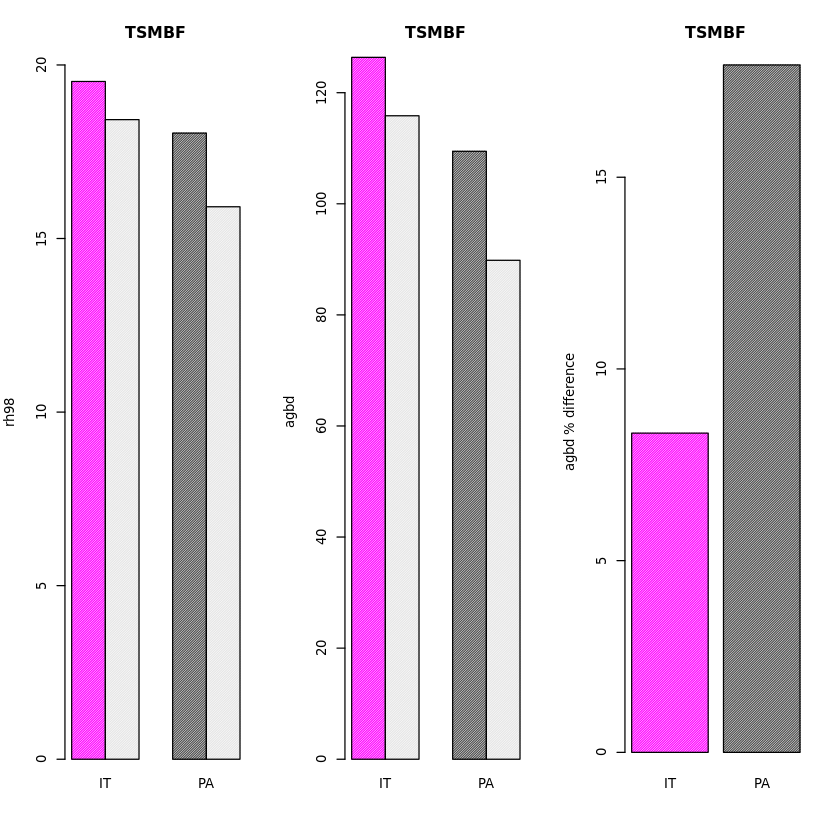

In [42]:
par(mfrow=c(1,3))
i=6
barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="rh98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)

barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,125),
                                  ylab="agbd", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)

barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T,
                                  ylab="agbd % difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)


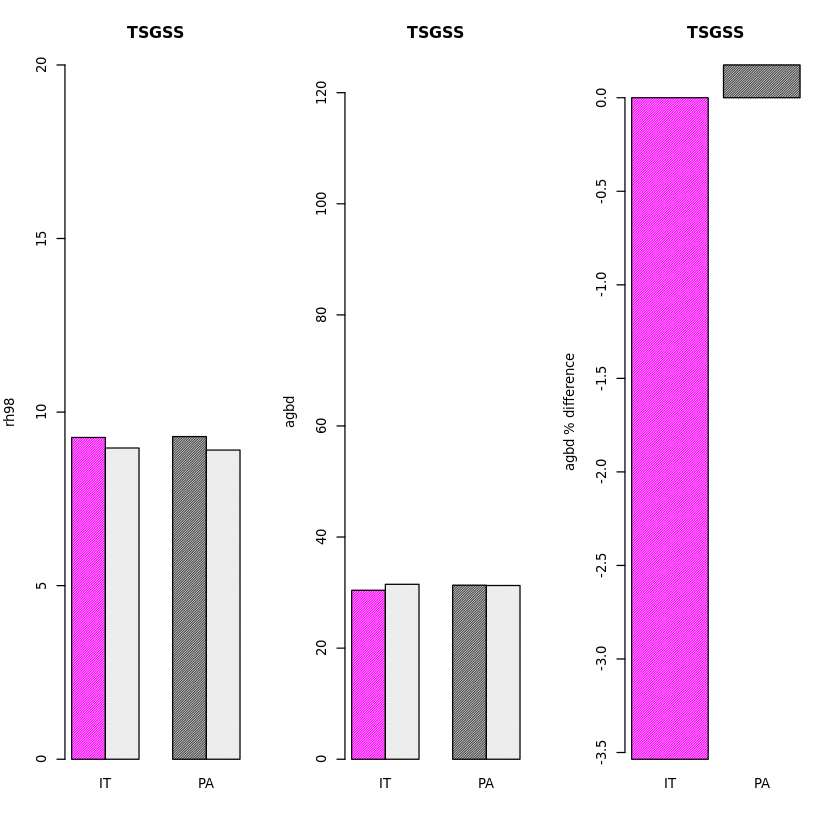

In [43]:
par(mfrow=c(1,3))
i=5
barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="rh98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)

barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,125),
                                  ylab="agbd", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)

barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T,
                                  ylab="agbd % difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)
